In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv("penyakit_jantung.csv")

# akan menampilkan data awal
print("Data awal\n")
display(df)  

print("\nJumlah kolom dan baris:")
print("Jumlah kolom:", df.shape[1])
print("Jumlah baris:", df.shape[0])


Data awal



,Usia,Jenis_Kelamin,Tipe_Nyeri_Dada,Tekanan_Darah_Istirahat,Kolesterol,Gula_Darah_Puasa,Elektrokardiogram_Istirahat,HR_Max,Nyeri_Dada_Olahraga,Depresi_ST,Kemiringan_ST,Jumlah_Pembuluh_Besar,Thalassemia,Penyakit_Jantung
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,01/03/2025,0,0,3,0
2,70,1,0,145,174,0,1,125,1,06/02/2025,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,09/01/2025,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,08/02/2025,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1



Jumlah kolom dan baris:
Jumlah kolom: 14
Jumlah baris: 1025


In [5]:
df.info()

print("\nJumlah missing value per kolom:")
# mengecek jumlah missing value
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Usia                         1025 non-null   int64 
 1   Jenis_Kelamin                1025 non-null   int64 
 2   Tipe_Nyeri_Dada              1025 non-null   int64 
 3   Tekanan_Darah_Istirahat      1025 non-null   int64 
 4   Kolesterol                   1025 non-null   int64 
 5   Gula_Darah_Puasa             1025 non-null   int64 
 6   Elektrokardiogram_Istirahat  1025 non-null   int64 
 7   HR_Max                       1025 non-null   int64 
 8   Nyeri_Dada_Olahraga          1025 non-null   int64 
 9   Depresi_ST                   1025 non-null   object
 10  Kemiringan_ST                1025 non-null   int64 
 11  Jumlah_Pembuluh_Besar        1025 non-null   int64 
 12  Thalassemia                  1025 non-null   int64 
 13  Penyakit_Jantung             1025

In [6]:
# target
target = "Penyakit_Jantung"

In [7]:
# SELEKSI FITUR MENGGUNAKAN CHI-SQUARE
hasil_chi2 = []

for col in df.columns:
    if col != target:
        # tabel kontingensi antara fitur dan target
        contingency_table = pd.crosstab(df[col], df[target])
        
        # Hitung Chi-Square
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Simpan hasil
        hasil_chi2.append({
            "Fitur": col,
            "Chi-Square": chi2,
            "p-value": p,
            "Signifikan (<0.05)": "Ya" if p < 0.05 else "Tidak"
        })

chi2_df = pd.DataFrame(hasil_chi2)
chi2_df


,Fitur,Chi-Square,p-value,Signifikan (<0.05)
0,Usia,178.766033,1.872323e-19,Ya
1,Jenis_Kelamin,78.863051,6.656821e-19,Ya
2,Tipe_Nyeri_Dada,280.982249,1.298066e-60,Ya
3,Tekanan_Darah_Istirahat,156.765973,1.824154e-13,Ya
4,Kolesterol,597.138624,2.463368e-54,Ya
5,Gula_Darah_Puasa,1.513379,2.186241e-01,Tidak
6,Elektrokardiogram_Istirahat,35.784315,1.696425e-08,Ya
7,HR_Max,368.270625,2.455372e-35,Ya
8,Nyeri_Dada_Olahraga,194.815539,2.826637e-44,Ya
9,Depresi_ST,311.012325,4.203278e-44,Ya


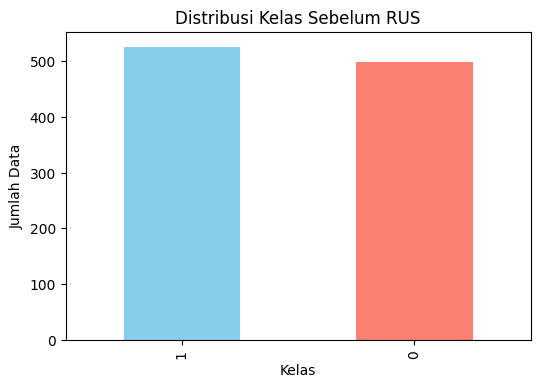

Jumlah data sebelum RUS:
  Kelas 1: 526
  Kelas 0: 499


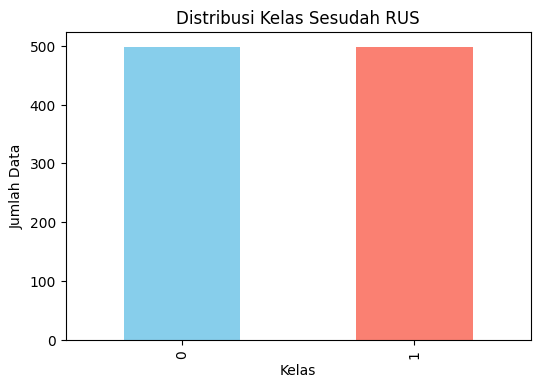


Jumlah data sesudah RUS:
  Kelas 0: 499
  Kelas 1: 499


In [ ]:
#IMBALANCED DATA (RUS)
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("penyakit_jantung.csv")
target = "Penyakit_Jantung"

X = df.drop(columns=[target])
y = df[target]

before_counts = y.value_counts()

plt.figure(figsize=(6,4))
before_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Kelas Sebelum RUS")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah data sebelum RUS:")
for kelas, jumlah in before_counts.items():
    print(f"  Kelas {kelas}: {jumlah}")

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

after_counts = y_res.value_counts()

plt.figure(figsize=(6,4))
after_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Kelas Sesudah RUS")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

print("\nJumlah data sesudah RUS:")
for kelas, jumlah in after_counts.items():
    print(f"  Kelas {kelas}: {jumlah}")
